# Surface

In [1]:
import numpy as np
from time import time

In [2]:
import euchar.utils as u
import euchar.surface as s
import euchar.filtrations as f

In [3]:
from euchar.display import matplotlib_plot, euler_curve_plot, euler_surface_plot

# 3d plots
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
np.random.seed(0)
m = 32
img1 = np.random.randint(0, 256, (m, m))
img2 = np.random.randint(0, 256, (m, m))
IMG1 = np.random.randint(0, 256, (m, m, m))
IMG2 = np.random.randint(0, 256, (m, m, m))

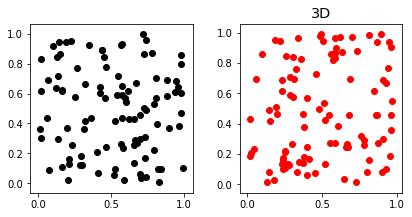

In [5]:
np.random.seed(0)
N = 100
pts2 = np.random.rand(N, 2)
pts3 = np.random.rand(N, 3)
fig, ax = matplotlib_plot(1, 2, figsize=(3,3))
ax[0].scatter(pts2[:,0], pts2[:,1], c="k")
ax[1].scatter(pts3[:,0], pts3[:,1], c="r")
ax[1].set(title="3D");

In [6]:
simplices_2d, alpha_2d = f.alpha_filtration_2D(pts2)
density_2d = f.inverse_density_filtration(pts2, simplices_2d, n_neighbors=6)
print(simplices_2d.shape, alpha_2d.shape, density_2d.shape)

(569, 3) (569,) (569,)


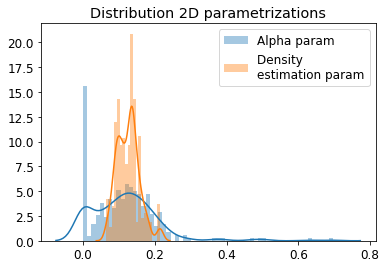

In [7]:
ax = sns.distplot(alpha_2d, label="Alpha param", bins=60)
ax = sns.distplot(density_2d, label="Density \nestimation param", bins=20)
ax.set(title="Distribution 2D parametrizations"); ax.legend();

In [8]:
simplices_3d, alpha_3d = f.alpha_filtration_3D(pts3)
density_3d = f.inverse_density_filtration(pts3, simplices_3d, n_neighbors=6)

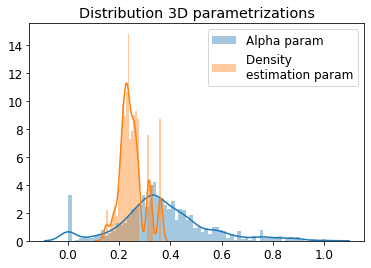

In [9]:
ax = sns.distplot(alpha_3d, label="Alpha param", bins=70)
ax = sns.distplot(density_3d, label="Density \nestimation param", bins=30)
ax.set(title="Distribution 3D parametrizations"); ax.legend();

***

### Surface .images_2D

In [10]:
bins = np.linspace(0, 255, num=256)
surf2d = s.images_2D(img1, img2)

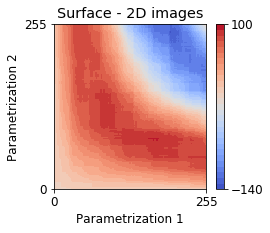

In [11]:
fig, ax = matplotlib_plot(figsize=(3.5,3), font_size=12)
euler_surface_plot(fig, ax, bins, bins, surf2d,
                   max_level=100, min_level=-140,
                   title="Surface - 2D images")

### Image with function

In [12]:
import cv2
kernel = np.ones((3,3), np.uint8)
import euchar.curve as c
from euchar.cppbinding.utils import char_binary_image_2d

In [1]:
surf_with_func = s.image_2D_and_function(img1, iterations=2, func=cv2.dilate, kwargs={'kernel': kernel})

NameError: name 's' is not defined

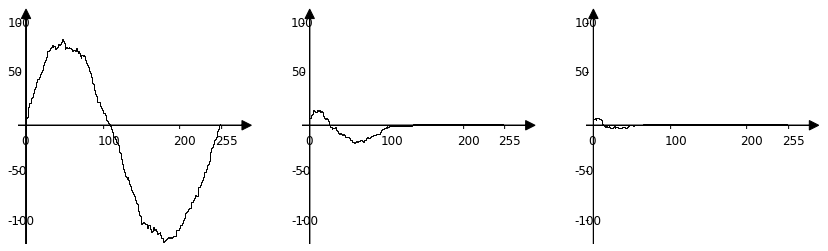

In [15]:
fig, ax = matplotlib_plot(1,3, figsize=(4,4))
xlim =[-10, 300]
ylim = [-120, 120]
xticks=[0, 100, 200, 255]
yticks=[-100, -50, 50, 100]

euler_curve_plot(fig, ax[0], np.linspace(0, 255, 256), surf_with_func[0], 
                 xlim=xlim, ylim=ylim, xticks=xticks, yticks=yticks)
euler_curve_plot(fig, ax[1], np.linspace(0, 255, 256), surf_with_func[1], 
                 xlim=xlim, ylim=ylim, xticks=xticks, yticks=yticks)
euler_curve_plot(fig, ax[2], np.linspace(0, 255, 256), surf_with_func[2], 
                 xlim=xlim, ylim=ylim, xticks=xticks, yticks=yticks)

### Surface .images_3D

In [16]:
v = np.load("C:\\Users\\44792\\data\\research\\vectors_euler_changes\\changes_3d.npy")

surf3d = s.images_3D(IMG1, IMG2, v, 255, 255)

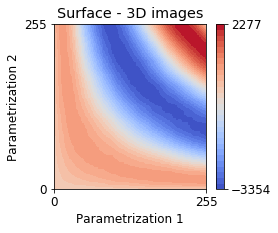

In [17]:
fig, ax = matplotlib_plot(figsize=(3.5,3), font_size=12)
euler_surface_plot(fig, ax, bins, bins, surf3d,
                   title="Surface - 3D images")

***

### Surface .bifiltration

In [18]:
bins1 = np.linspace(0, 0.9, num=100)
bins2 = np.linspace(0, 0.25, num=100)

In [19]:
st = time()
surf = s.bifiltration(simplices_2d, alpha_2d, density_2d, bins1, bins2)
print(f"time: {time() -st:.3f}")
surf = np.copy(surf)

time: 0.005


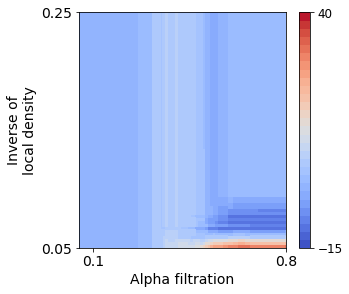

In [22]:
fig, ax = matplotlib_plot(figsize=(4.5,4), font_size=12, facecolor="w")
euler_surface_plot(fig, ax, bins1, bins2, surf, n_levels=30, 
                   min_level=-15, max_level=40, 
                   xlim=[0.05, 0.8], ylim = [0.05, 0.25],
                   xticks=[0.1, 0.8], yticks=[0.05, 0.25],
                   xlabel="Alpha filtration", ylabel="Inverse of\nlocal density",
                   color_map="coolwarm",
                   title="")

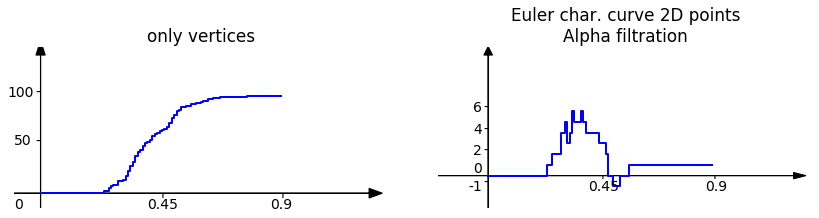

In [21]:
fig, ax = matplotlib_plot(1, 2, figsize=(6,3), font_size=14)
euler_curve_plot(fig, ax[0], bins1, surf[0], 
                 line_color="b", line_width=2,
                 xticks=[0, 0.45, 0.9], xlim=[-0.1, 1.3],
                 xticks_locations=[(-0.1, -15), (0.4, -15), (0.86, -15)],
                 xticks_spacing=(0,-10),
                 x_arrow_head_width=10, x_arrow_head_length=0.05,
                 yticks=[50, 100], ylim=[-15, 150],
                 y_arrow_head_width=0.035, y_arrow_head_length=15,
                 yticks_locations=[(-0.1, 50), (-0.125, 100)],
                 yticks_spacing=(-0.02, 0),
                 font_size_ticks=14)
euler_curve_plot(fig, ax[1], bins1, surf[-1],
                 line_color="b", line_width=2, 
                 xlim=[-0.2, 1.3], ylim=[-3, 12],
                 x_arrow_head_width=0.6, x_arrow_head_length=0.05,
                 y_arrow_head_width=0.035, y_arrow_head_length=0.8,
                 xticks=[0, 0.45, 0.9], xticks_locations=[(-0.06, 0.3), (0.4, -1.3), (0.87, -1.3)],
                 xticks_spacing=(0, -0.8), 
                 yticks=[-1, 2, 4, 6],
                 yticks_spacing=(-0.02,0), yticks_locations=[(-0.08, -1.3),(-0.06, 2), (-0.06, 4), (-0.06, 6)],
                 font_size_ticks=14)
ax[0].set(title="only vertices");ax[1].set(title="Euler char. curve 2D points\nAlpha filtration");